In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=02449c81b718f98a89fce9f1f613daf9


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 503,
   'main': 'Rain',
   'description': 'very heavy rain',
   'icon': '10d'},
  {'id': 211,
   'main': 'Thunderstorm',
   'description': 'thunderstorm',
   'icon': '11d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 65.12,
  'feels_like': 67.69,
  'temp_min': 62.6,
  'temp_max': 66.2,
  'pressure': 1007,
  'humidity': 93},
 'visibility': 8047,
 'wind': {'speed': 3.36, 'deg': 180},
 'rain': {'1h': 40.13},
 'clouds': {'all': 90},
 'dt': 1593379167,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1593335394,
  'sunset': 1593390304},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# Get the JSON data.
boston_data = city_weather.json()

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 66.2 93 90 3.36


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 28, 21, 19, 27)

In [12]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-28 21:19:27'

In [13]:
# #Get the City Weather Data from 500+ cities

# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

In [14]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + "i"

In [15]:
#Get the City Weather Data from 500+ cities

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
#retrieve the data from the JSON weather response for each city.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | faya
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | kyabram
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | tres arroyos
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | kidal
Processing Record 15 of Set 1 | qasigiannguit
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | araguacu
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | hartford
Processing Record 22 of Set 1 | luanda
Processing Record 23 of Set 1 | tasiil

Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | vanavara
Processing Record 42 of Set 4 | idah
Processing Record 43 of Set 4 | cortez
Processing Record 44 of Set 4 | soni
Processing Record 45 of Set 4 | sechura
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | presidencia roque saenz pena
Processing Record 50 of Set 4 | komsomolskiy
Processing Record 1 of Set 5 | lasa
Processing Record 2 of Set 5 | cairns
Processing Record 3 of Set 5 | razole
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | russell
Processing Record 6 of Set 5 | victor harbor
Processing Record 7 of Set 5 | roma
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | tidore
City not found. Skipping...
Processing Record 10 of Set 5 | moindou
Processing Record 11 of Set 5 | padang
Processing Record 12 of Set 5 | mankono
Processing Record 13 of Set 5 |

Processing Record 32 of Set 8 | vardo
Processing Record 33 of Set 8 | luderitz
Processing Record 34 of Set 8 | san fernando
Processing Record 35 of Set 8 | finschhafen
Processing Record 36 of Set 8 | ilanskiy
Processing Record 37 of Set 8 | mizan teferi
Processing Record 38 of Set 8 | radece
Processing Record 39 of Set 8 | along
Processing Record 40 of Set 8 | flinders
Processing Record 41 of Set 8 | paracatu
Processing Record 42 of Set 8 | saint-gaudens
Processing Record 43 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | guhagar
Processing Record 46 of Set 8 | manggar
Processing Record 47 of Set 8 | fecamp
Processing Record 48 of Set 8 | karamea
City not found. Skipping...
Processing Record 49 of Set 8 | kerouane
Processing Record 50 of Set 8 | veinticinco de mayo
Processing Record 1 of Set 9 | nizhniy odes
Processing Record 2 of Set 9 | balimo
City not found. Skipping...
Processing Re

Processing Record 20 of Set 12 | csakvar
Processing Record 21 of Set 12 | dunedin
Processing Record 22 of Set 12 | rafsanjan
Processing Record 23 of Set 12 | banda aceh
Processing Record 24 of Set 12 | yenangyaung
Processing Record 25 of Set 12 | catalao
Processing Record 26 of Set 12 | mitsamiouli
Processing Record 27 of Set 12 | lubango
Processing Record 28 of Set 12 | villa del rosario
Processing Record 29 of Set 12 | kuche
City not found. Skipping...
Processing Record 30 of Set 12 | parana
Processing Record 31 of Set 12 | whakatane
Processing Record 32 of Set 12 | kantang
Processing Record 33 of Set 12 | high level
Processing Record 34 of Set 12 | pochutla
Processing Record 35 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 12 | vuktyl
Processing Record 37 of Set 12 | mogadishu
Processing Record 38 of Set 12 | san jose
Processing Record 39 of Set 12 | nizwa
Processing Record 40 of Set 12 | te anau
Processing Record 41 of Set 12 | viligili
City not fo

In [16]:
len(city_data)

569

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,84.78,71,27,8.86,MV,2020-06-28 21:21:32
1,Rikitea,-23.12,-134.97,67.82,59,0,20.13,PF,2020-06-28 21:21:32
2,Saint-Philippe,-21.36,55.77,66.20,77,40,6.93,RE,2020-06-28 21:21:32
3,Yellowknife,62.46,-114.35,68.00,37,40,6.93,CA,2020-06-28 21:18:26
4,Faya,18.39,42.45,80.60,19,100,4.70,SA,2020-06-28 21:21:32
5,San Patricio,19.22,-104.70,86.00,74,75,23.04,MX,2020-06-28 21:21:32
6,Kyabram,-36.32,145.05,37.99,91,28,4.23,AU,2020-06-28 21:21:32
7,Castro,-24.79,-50.01,54.21,82,99,5.97,BR,2020-06-28 21:18:23
8,Port Elizabeth,-33.92,25.57,57.20,62,34,12.75,ZA,2020-06-28 21:18:23
9,Klaksvik,62.23,-6.59,55.40,76,94,20.80,FO,2020-06-28 21:21:32


In [18]:
# new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [19]:
# new_city_data_df=city_data_df[new_column_order]

In [20]:
# new_city_data_df.head()

In [21]:
#Another way to change columns in a DF
city_data_df=city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

In [22]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2020-06-28 21:21:32,-0.60,73.08,84.78,71,27,8.86
1,Rikitea,PF,2020-06-28 21:21:32,-23.12,-134.97,67.82,59,0,20.13
2,Saint-Philippe,RE,2020-06-28 21:21:32,-21.36,55.77,66.20,77,40,6.93
3,Yellowknife,CA,2020-06-28 21:18:26,62.46,-114.35,68.00,37,40,6.93
4,Faya,SA,2020-06-28 21:21:32,18.39,42.45,80.60,19,100,4.70


In [23]:
# Set the destination of the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593379330.612355

In [26]:
today=time.strftime("%x")
today

'06/28/20'

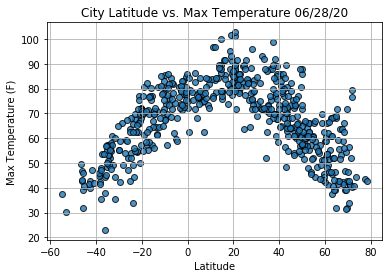

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

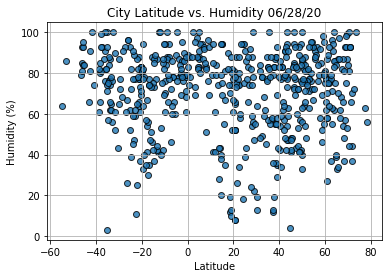

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

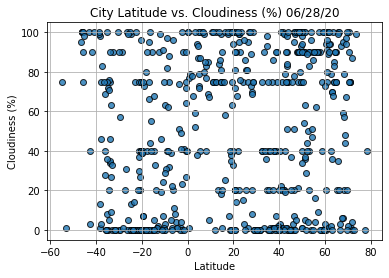

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

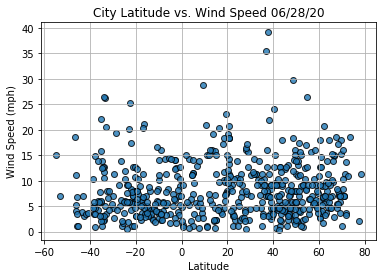

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
from scipy.stats import linregress

In [52]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [45]:
#index13= city_data_df.loc[13]
#index13

In [46]:
#North Hemispheres (Latitudes greater than or equal to 0)
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
564     True
565    False
566     True
567    False
568     True
Name: Lat, Length: 569, dtype: bool

In [47]:
# Locate only the trues
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Yellowknife,CA,2020-06-28 21:18:26,62.46,-114.35,68.00,37,40,6.93
4,Faya,SA,2020-06-28 21:21:32,18.39,42.45,80.60,19,100,4.70
5,San Patricio,MX,2020-06-28 21:21:32,19.22,-104.70,86.00,74,75,23.04
9,Klaksvik,FO,2020-06-28 21:21:32,62.23,-6.59,55.40,76,94,20.80
13,Kidal,ML,2020-06-28 21:18:27,18.44,1.41,95.09,12,0,10.11
...,...,...,...,...,...,...,...,...,...
562,Belaya Gora,RU,2020-06-28 21:22:10,68.53,146.42,62.29,48,79,5.46
563,Mahon,ES,2020-06-28 21:22:10,39.89,4.27,71.60,83,0,3.36
564,Cedar City,US,2020-06-28 21:17:24,37.68,-113.06,84.20,19,1,39.15
566,Carlsbad,US,2020-06-28 21:21:43,33.16,-117.35,72.00,68,90,9.17


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

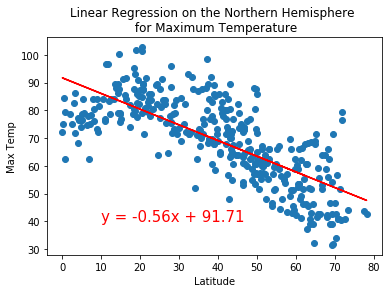

In [61]:
# Linear regression on the Northern Hemisphere for Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [65]:
linregress(x_values, y_values)

LinregressResult(slope=-0.5648550706259913, intercept=91.71282857911721, rvalue=-0.7393003354798267, pvalue=3.5294055555455145e-65, stderr=0.02681944248477767)

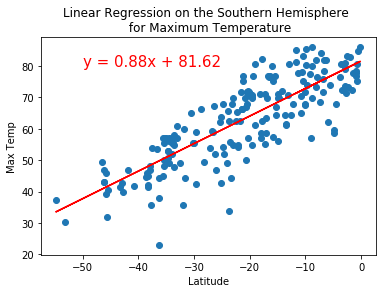

In [59]:
# Linear regression on the Southern Hemisphere for Temperature 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

In [60]:
linregress(x_values, y_values)

LinregressResult(slope=0.8772656592548186, intercept=81.622473706601, rvalue=0.8240721010847241, pvalue=1.6416173001661148e-50, stderr=0.0429656279193553)

In [66]:
#This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
#And when we are further from the equator the temperatures become cooler.

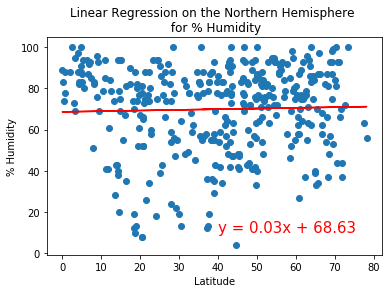

In [71]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"] #IV
y_values = northern_hemi_df["Humidity"] #DV
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [72]:
linregress(x_values, y_values)

LinregressResult(slope=0.03243646770143437, intercept=68.62526926011125, rvalue=0.0302110837437143, pvalue=0.562395039643413, stderr=0.055942910449500914)

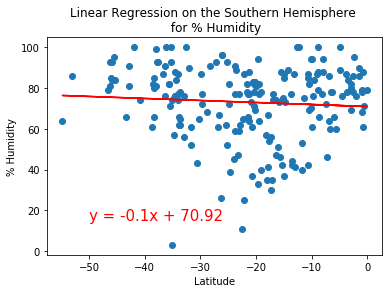

In [73]:
# Linear regression on the Southern Hemisphere for Humidity 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [74]:
linregress(x_values, y_values)

LinregressResult(slope=-0.09892678005894279, intercept=70.91887204680845, rvalue=-0.06965331688073327, pvalue=0.3282826268875728, stderr=0.10094455227218017)

In [75]:
# The correlation between the latitude and percent humidity is very low 
# This means that percent humidity is unpredictable due to changing 
  # weather patterns that can increase or decrease percent humidity.

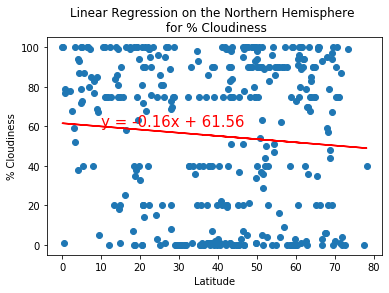

In [84]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

In [85]:
linregress(x_values, y_values)

LinregressResult(slope=-0.16098799858651303, intercept=61.56105597442765, rvalue=-0.08273755021868745, pvalue=0.11209907764480988, stderr=0.10108235257949193)

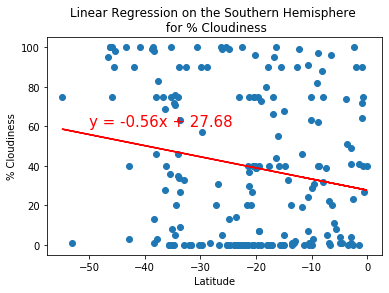

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [88]:
linregress(x_values, y_values)

LinregressResult(slope=-0.5636436894771961, intercept=27.683912888516154, rvalue=-0.19394230006950822, pvalue=0.006055371372396641, stderr=0.20312984125173295)

In [ ]:
# small r-values for both hemispheres
# This means that cloudiness is unpredictable 
  #due to changing weather patterns that can increase or decrease percent cloudiness. 

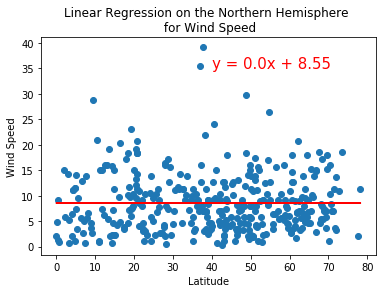

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [91]:
linregress(x_values, y_values)

LinregressResult(slope=2.812399729660739e-05, intercept=8.54865978314826, rvalue=9.765913648167146e-05, pvalue=0.9985062374696247, stderr=0.015012058780544365)

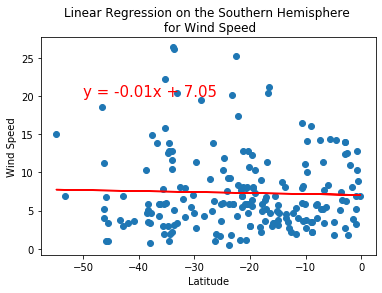

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

In [94]:
linregress(x_values, y_values)

LinregressResult(slope=-0.012824982333193239, intercept=7.04509076290008, rvalue=-0.03223077250559279, pvalue=0.6513236029939231, stderr=0.028335263322041216)

In [ ]:
# This means that wind speed is unpredictable 
  # due to changing weather patterns that can increase or decrease wind speed.